In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
strt = '1989-10-01'
nd = '2012-12-31'

In [3]:
c1_P1 = pd.read_pickle('/RHESSys/ComoCreek_new/clim/C1_chart_prec.pcl')[strt:nd]
for i in c1_P1.index:
    
    # skip entries that are only one day
    if (c1_P1.loc[i,'Qual_days'] == 1) or (np.isnan(c1_P1.loc[i,'Qual_days']) == True):
        continue
    else:
        days = c1_P1.loc[i,'Qual_days']
        td = pd.datetools.timedelta(days-1)
        strt2 = i-td
        c1_P1.loc[strt2:i,'P'] = c1_P1.loc[i,'P']/float(days)
        c1_P1.loc[strt2:i,'Qual_days'] = 1.
        c1_P1.loc[strt2:i,'flag'] = 'F'

c1_T1 = pd.read_pickle('/RHESSys/ComoCreek_new/clim/C1_chart_temp.pcl')[strt:nd]

In [4]:
c1_P1.P /= 1000 # convert from mm to m

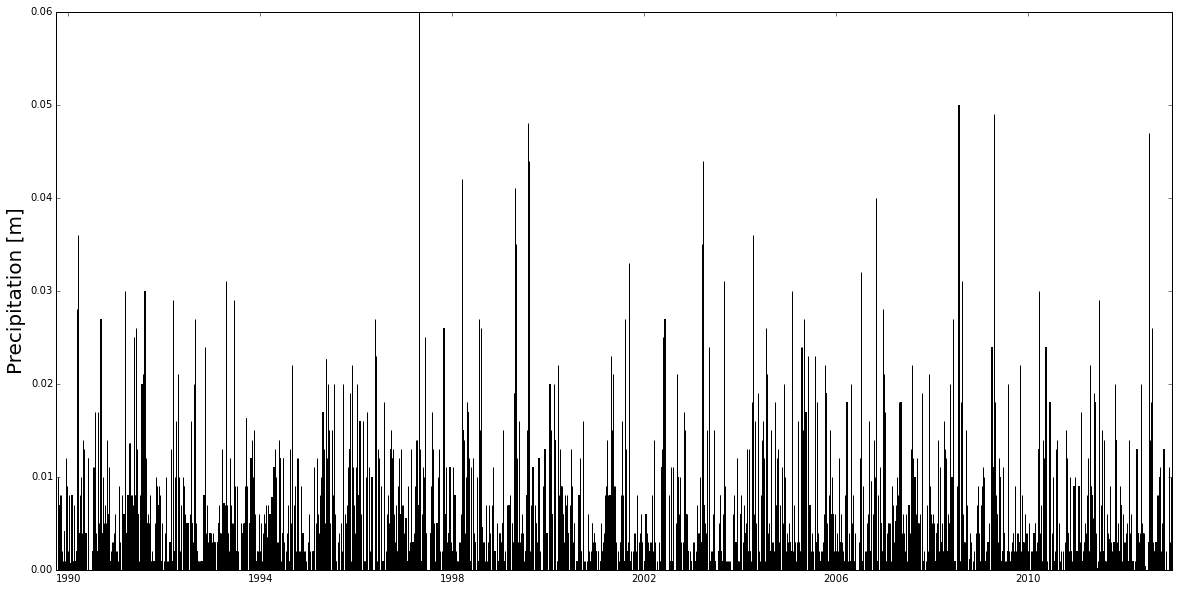

In [12]:
plt.figure(figsize=(20,10))
plt.bar(c1_P1.index,c1_P1.P)
plt.ylabel('Precipitation [m]',fontsize=20)

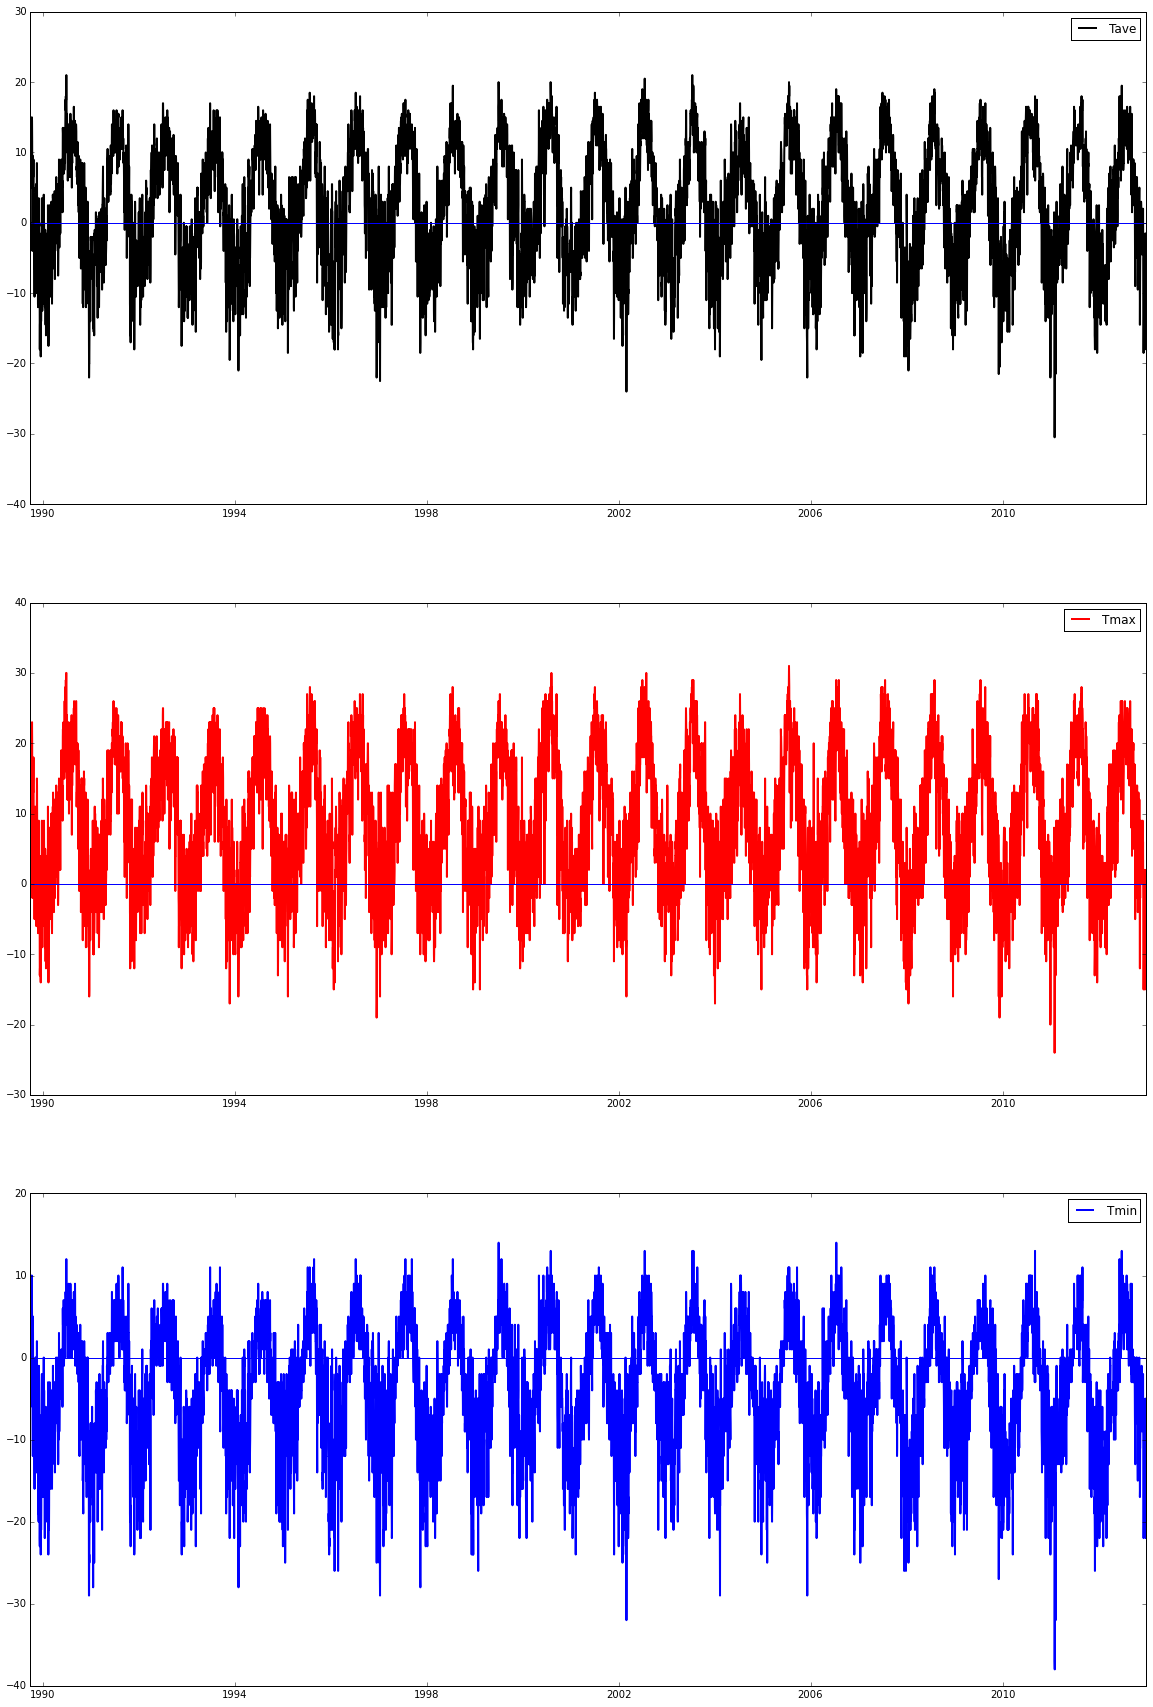

In [17]:
fig = plt.figure(figsize=(20,30))
ax1 = fig.add_subplot(311)
ax1.plot(c1_T1.index,c1_T1.Tave,'-k',lw=2)
ax1.legend(['Tave'])
ax1.axhline(0)
ax2 = fig.add_subplot(312)
ax2.plot(c1_T1.index,c1_T1.Tmax,'-r',lw=2)
ax2.legend(['Tmax'])
ax2.axhline(0)
ax3 = fig.add_subplot(313)
ax3.plot(c1_T1.index,c1_T1.Tmin,'-b',lw=2)
ax3.legend(['Tmin'])
ax3.axhline(0)

(734411.0, 734776.0)

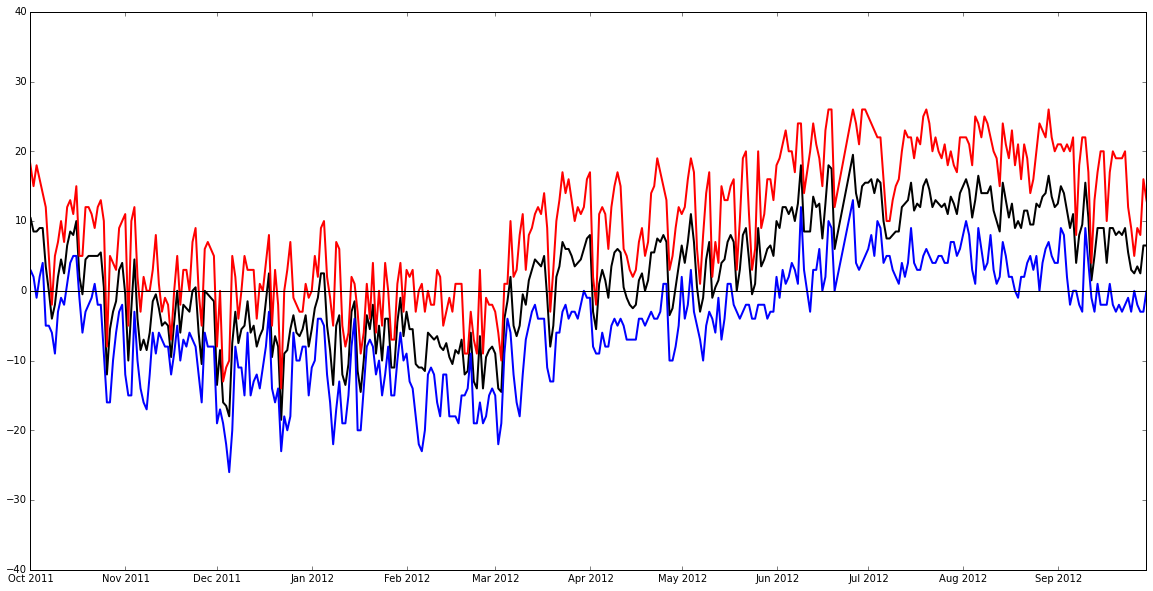

In [18]:
plt.figure(figsize=(20,10))
plt.plot(c1_T1.index,c1_T1.Tave,'-k',lw=2)
plt.plot(c1_T1.index,c1_T1.Tmax,'-r',lw=2)
plt.plot(c1_T1.index,c1_T1.Tmin,'-b',lw=2)
plt.axhline(0,c='k')
plt.xlim('2011-10-1','2012-9-30')

In [8]:
#QA/QC
c1_P1.loc[np.isnan(c1_P1.P)==True,'P']=0. # zero missing data
c1_T1.interpolate(method='time',inplace=True)

In [9]:
P = c1_P1['P'].as_matrix()
Tmax = c1_T1['Tmax'].as_matrix()
Tmin = c1_T1['Tmin'].as_matrix()

In [10]:
# save as txt
header='1989 10 1'
np.savetxt('/RHESSys/ComoCreek_new/clim/c1.tmin',Tmin, header=header,comments='',fmt='%.6f')
np.savetxt('/RHESSys/ComoCreek_new/clim/c1.tmax',Tmax,header=header,comments='',fmt='%.6f')
np.savetxt('/RHESSys/ComoCreek_new/clim/c1.rain',P,header=header,comments='',fmt='%.6f')